### Доверительный интервал

In [3]:
values = np.array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])

In [4]:
np.std(values)

3.0

In [13]:
# X_mean +- 1.96*se для 95% доверительного интервала
# X_mean +- 2.58*se для 99% доверительного интервала
X_mean = 10
sd = 5
n = 100

se = sd / 100**0.5
X_1 = X_mean - 2.58 * se
X_2 = X_mean + 2.58 * se

In [14]:
print(X_1, X_2)

8.71 11.29


In [15]:
X_mean = 18.5
sd = 4
n = 64

se = sd / n**0.5
X_1 = X_mean - 1.96 * se
X_2 = X_mean + 1.96 * se

In [16]:
print(X_1, X_2)

17.52 19.48


In [17]:
#Выборка: X_mean = 136
#99% доверительный интерал [X_mean - 2.58 * se; X_mean - 2.58 * se]

In [18]:
#Ген. совокупность: М = 115
#Выборка: X_mean = 118, sd = 9, n = 144
M = 115
X_mean = 118
sd = 9
n = 144

se = sd / n**0.5
Z_score = (X_mean - M) / se

Z_score #Значение b на калькуляторе, где standard deviation = 1 (ед. изм = ст. отклонения)

4.0

### Сравнение двух средних

In [2]:
# X_mean +- 1.96*se для 95% доверительного интервала
# Однако в случае t-распределения 95% наблюдений могут лежать в более широком диапазоне
t = 2.093 # по таблице для А=0.95

In [3]:
X_mean = 89.9
sd = 11.3
n = 20

In [4]:
se = sd / n**0.5
X_1 = X_mean - t * se
X_2 = X_mean + t * se
print(X_1, X_2)

84.61149798709502 95.18850201290499


In [7]:
#Средний возраст мужчин
X_1 = 45
sd_1 = 9
n_1 = 100
#Средний возраст женщин
X_2 = 34
sd_2 = 10
n_2 = 100

In [8]:
se = (sd_1**2 / n_1 + sd_2**2 / n_2)**0.5

In [10]:
t = (X_1 - X_2) / se
t

8.176235608718828

### One-way ANOVA, однофакторный дисперсионный анализ

In [1]:
import pandas as pd
therapy_df = pd.read_csv('genetherapy.csv')
therapy_df.head()

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [6]:
therapy_df.groupby('Therapy').count()

,expr
Therapy,
A,15
B,15
C,15
D,15


In [2]:
# expr = независимая переменная, уровень экспрессии гена
# Therapy = зависимая переменная, тип терапии
from scipy.stats import f_oneway

HO = 'В генеральной совокупности средний уровень экспрессии генов будет абсолютно одинаковый при использовании всех четырёх видов терпапии' </br>
H1 = 'Как минимум два средних значимо различаются между собой'

In [8]:
therapy_df[therapy_df.Therapy == 'A'].expr
therapy_df[therapy_df.Therapy == 'B'].expr
therapy_df[therapy_df.Therapy == 'C'].expr
therapy_df[therapy_df.Therapy == 'D'].expr

f_oneway(therapy_df[therapy_df.Therapy == 'A'].expr, therapy_df[therapy_df.Therapy == 'B'].expr,
         therapy_df[therapy_df.Therapy == 'C'].expr, therapy_df[therapy_df.Therapy == 'D'].expr)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

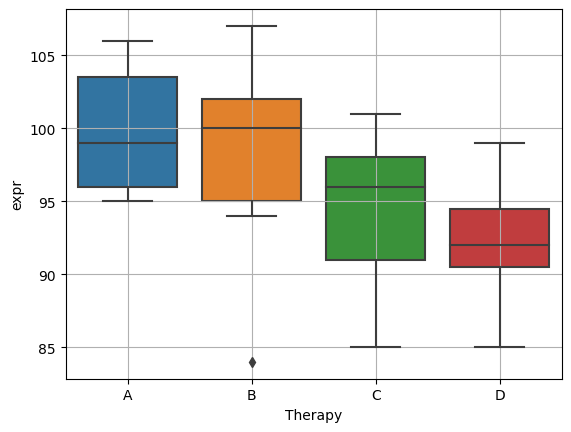

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data = therapy_df, x = 'Therapy', y = 'expr')

plt.grid()
plt.show()

Если доверительные интервалы не включают среднее значение друг друга, то такие различия будут значимы. </br>

### Критерий Тьюки

In [20]:
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [23]:
print(pairwise_tukeyhsd(therapy_df.expr, therapy_df.Therapy, alpha=0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333 0.9514  -5.5959  3.7292  False
     A      C  -5.3333 0.0189  -9.9959 -0.6708   True
     A      D     -7.4 0.0005 -12.0626 -2.7374   True
     B      C     -4.4  0.071  -9.0626  0.2626  False
     B      D  -6.4667 0.0029 -11.1292 -1.8041   True
     C      D  -2.0667 0.6458  -6.7292  2.5959  False
-----------------------------------------------------


### Поправка Бонферрони

In [25]:
import math

In [27]:
#C k по n, для попарного сравнения
math.factorial(3) / math.factorial(2) / math.factorial(3-2)

3.0

In [28]:
p = 0.05
p / 3

0.016666666666666666

### Многофакторный ANOVA

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
sns.set_style('darkgrid')

In [2]:
ghen_df = pd.read_csv('atherosclerosis.csv')
ghen_df.head(3)

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1


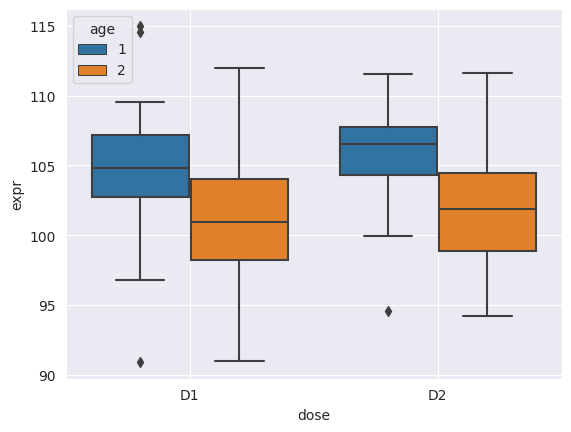

In [13]:
sns.boxplot(data = ghen_df, x = ghen_df.dose, y = ghen_df.expr, hue = ghen_df.age)
plt.grid(True)
plt.show()

In [17]:
pg.anova(dv = 'expr', between = ['age', 'dose'], data = ghen_df)

,Source,SS,DF,MS,F,p-unc,np2
0,age,197.452754,1,197.452754,7.449841,0.008313,0.110450
1,dose,16.912241,1,16.912241,0.638094,0.427552,0.010523
2,age * dose,0.927077,1,0.927077,0.034978,0.852272,0.000583
3,Residual,1590.257424,60,26.504290,NaN,NaN,NaN


In [18]:
pg.anova(dv = 'expr', between = ['age', 'dose'], data = ghen_df, detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,age,197.452754,1,197.452754,7.449841,0.008313,0.110450
1,dose,16.912241,1,16.912241,0.638094,0.427552,0.010523
2,age * dose,0.927077,1,0.927077,0.034978,0.852272,0.000583
3,Residual,1590.257424,60,26.504290,NaN,NaN,NaN


### Взаимодействие факторов в ANOVA

In [19]:
birds_df = pd.read_csv('birds.csv')
birds_df.head(3)

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1


In [20]:
pg.anova(dv = 'var4', between = ['hormone', 'sex'], data = birds_df)

,Source,SS,DF,MS,F,p-unc,np2
0,hormone,0.847472,1,0.847472,0.086528,0.769653,0.001440
1,sex,0.119762,1,0.119762,0.012228,0.912318,0.000204
2,hormone * sex,89.483384,1,89.483384,9.136390,0.003682,0.132150
3,Residual,587.650394,60,9.794173,NaN,NaN,NaN


Независимые переменные = Инъекция (отсутствие или наличие) и Пол. </br>
Зависимая переменная = Концентрация кальция. </br>
Ни фактор инъекции, ни фактор пола не оказали значимого влияния на зависимую переменную. Изменчивость, которая обуславливается этими факторами, очень не велика. </br>
**Но** взаимодействие этих факторов оказало довольно значимое влияние.

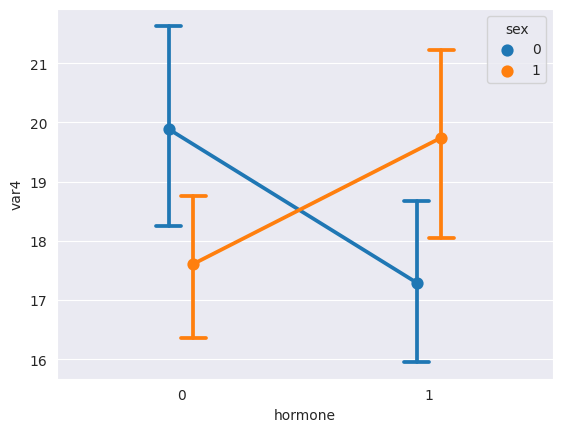

In [25]:
sns.pointplot(x = 'hormone', y = 'var4', hue= 'sex' , dodge = 0.1, capsize = .1, data = birds_df)
plt.show()

Сам факт инъекции **по разному** повлиял на концентрацию кальция в плазме в зависимости от пола.